## House Price Prediction - Assignment Solution

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

The company is looking at prospective properties to buy to enter the market.You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1. Which variables are significant in predicting the price of a house

2. How well those variables describe the price of a house

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

You are required to model the price of houses with the available independent variables. It will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high rewards. Further, the model will be a good way for management to understand the pricing dynamics of a new market.




### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [16]:
# reading the dataset
house = pd.read_csv("train.csv")
house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
# summary of the dataset:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [18]:
# Checking the percentage of missing values
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

### Dropping all columns with more than 75% of missing values

In [19]:
house1 = house.dropna(thresh=house.shape[0]*0.75,how='all',axis=1)
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [20]:
# Checking the percentage of missing values
round(100*(house1.isnull().sum()/len(house1.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

### Removing the variables which have little to no variance.

In [21]:
#Removing the variables which have little to no variance.
print(house1['Street'].value_counts())
print(house1['Utilities'].value_counts())
print(house1['Condition2'].value_counts())
print(house1['RoofMatl'].value_counts())
print(house1['Heating'].value_counts())
print(house1['LowQualFinSF'].value_counts())
print(house1['3SsnPorch'].value_counts())
print(house1['PoolArea'].value_counts())
print(house1['MiscVal'].value_counts())
print(house1['CentralAir'].value_counts())
print(house1['KitchenAbvGr'].value_counts())
# Removing all variables listed above which have little to no variation.
variables = ['Street','Utilities','Condition2','RoofMatl','Heating','LowQualFinSF','3SsnPorch','PoolArea','MiscVal','CentralAir','KitchenAbvGr']
house1.drop(variables,inplace=True,axis=1)

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64
0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
16

In [22]:
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460 non-null object
ExterCond        1460 no

In [23]:
numerical_features = house1.select_dtypes(include=["float64","int64","bool","float","int"])
numerical_features.drop('Id',inplace=True,axis=1)
numerical_features.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2003.0,2,548,0,61,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1976.0,2,460,298,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2001.0,2,608,0,42,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1998.0,3,642,0,35,272,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,2000.0,3,836,192,84,0,0,12,2008,250000


In [24]:
# correlation matrix
cor = numerical_features.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.026030,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.041383,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.043160,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.064886,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.054811,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,-0.050364,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,-0.038740,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.061466,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.062021,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.015211,0.031706,-0.011378


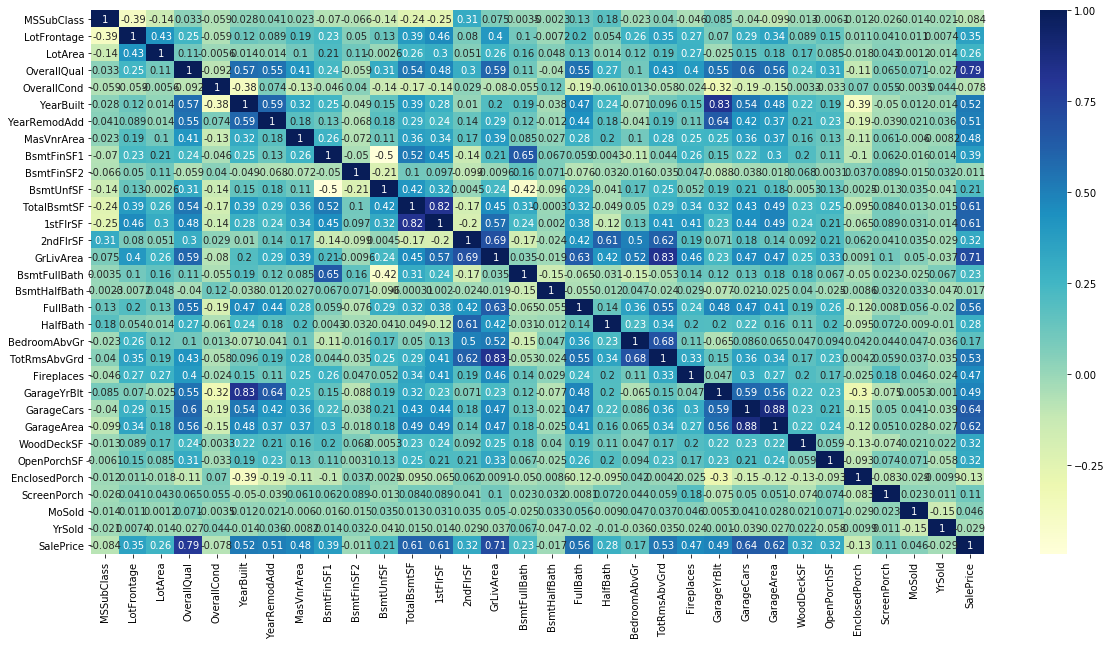

In [25]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### From above graph, it is clear that Overall Quality, GrLivArea(Above ground living area), Garage Area and Garage Cars have higher correlation with the Sale Price.

#### Sale Price has negative correlation with OverallCond, Basement Half Bathroom and Enclosed Porch


In [26]:
numerical_features.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


### Outlier Treatment

In [27]:
# outlier treatment
for  i in numerical_features.columns:
    Q1 = house1[i].quantile(0.05)
    Q3 = house1[i].quantile(0.95)
    IQR = Q3 - Q1
    house1 = house1[(house1[i] >= Q1 - 1.5*IQR) & (house1[i] <= Q3 + 1.5*IQR)]

In [30]:
numerical_features = house1.select_dtypes(include=["float64","int64","bool","float","int"])
print(numerical_features.shape)
numerical_features.describe()

(1093, 33)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,...,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,727.543458,56.280878,69.886551,9542.862763,6.173833,5.556267,1972.307411,1985.533394,102.333028,424.747484,...,1978.419030,1.869167,499.214090,90.029277,43.955169,21.796889,14.279963,6.343092,2007.805124,182107.293687
std,420.367046,41.972941,21.451921,3764.833876,1.353659,1.061217,30.874713,21.154629,170.240271,430.463102,...,25.793596,0.654857,188.685184,117.313413,58.424138,59.796288,52.060742,2.686682,1.334074,76910.638594
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,368.000000,20.000000,60.000000,7560.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,1959.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,726.000000,50.000000,70.000000,9317.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,368.000000,...,1980.000000,2.000000,484.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1091.000000,70.000000,80.000000,11250.000000,7.000000,6.000000,2003.000000,2005.000000,168.000000,698.000000,...,2003.000000,2.000000,594.000000,168.000000,66.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,182.000000,35133.000000,10.000000,9.000000,2010.000000,2010.000000,1047.000000,2188.000000,...,2010.000000,4.000000,1390.000000,736.000000,364.000000,386.000000,385.000000,12.000000,2010.000000,611657.000000


## 2. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [31]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = house1.select_dtypes(include=['object'])
house_categorical.head()


,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [32]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [33]:
# drop categorical variables 
house1 = house1.drop(list(house_categorical.columns), axis=1)

In [34]:
# concat dummy variables with house1
house1 = pd.concat([house1, house_dummies], axis=1)

In [35]:
columns = list(house1.columns)
columns.remove('SalePrice')
len(columns)

202

## 3. Model Building and Evaluation

In [36]:
# split into X and y
X = house1[columns]
X_bkup = X
X.drop('Id',inplace=True,axis=1)


y = house1['SalePrice']
X.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [37]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,...,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03,1.093000e+03
mean,-1.156948e-16,4.977212e-17,-1.424854e-16,1.137648e-17,-4.880715e-16,-1.179904e-15,6.217452e-16,-1.649590e-16,4.997527e-17,-5.708558e-17,...,-6.761136e-17,-3.498777e-16,1.890325e-16,-1.562108e-16,-2.717152e-16,-1.561029e-16,-1.953048e-16,-4.586145e-17,-1.906577e-16,-2.181847e-16
std,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,...,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00,1.000458e+00
min,-8.647830e-01,-2.279932e+00,-2.190438e+00,-3.084784e+00,-3.352656e+00,-2.991110e+00,-1.680467e+00,-6.013846e-01,-9.871739e-01,-2.833470e-01,...,-5.246231e-02,-6.060606e-02,-3.412409e-01,-3.026138e-02,-2.363120e+00,-3.026138e-02,-9.111851e-02,-1.293993e-01,-2.032598e+00,-3.462327e-01
25%,-8.647830e-01,-4.610812e-01,-5.269211e-01,-8.675532e-01,-5.244186e-01,-6.256333e-01,-9.237853e-01,-6.013846e-01,-9.871739e-01,-2.833470e-01,...,-5.246231e-02,-6.060606e-02,-3.412409e-01,-3.026138e-02,4.231693e-01,-3.026138e-02,-9.111851e-02,-1.293993e-01,4.919812e-01,-3.462327e-01
50%,-1.497096e-01,5.290955e-03,-6.002022e-02,-1.284763e-01,-5.244186e-01,5.484631e-02,4.477006e-01,-6.013846e-01,-1.318893e-01,-2.833470e-01,...,-5.246231e-02,-6.060606e-02,-3.412409e-01,-3.026138e-02,4.231693e-01,-3.026138e-02,-9.111851e-02,-1.293993e-01,4.919812e-01,-3.462327e-01
75%,3.270060e-01,4.716631e-01,4.536505e-01,6.106006e-01,4.183273e-01,9.945563e-01,9.206267e-01,3.859077e-01,6.350779e-01,-2.833470e-01,...,-5.246231e-02,-6.060606e-02,-3.412409e-01,-3.026138e-02,4.231693e-01,-3.026138e-02,-9.111851e-02,-1.293993e-01,4.919812e-01,-3.462327e-01
max,3.187299e+00,5.228659e+00,6.800261e+00,2.827831e+00,3.246565e+00,1.221383e+00,1.157090e+00,5.551562e+00,4.098051e+00,6.826593e+00,...,1.906130e+01,1.650000e+01,2.930481e+00,3.304542e+01,4.231693e-01,3.304542e+01,1.097472e+01,7.728015e+00,4.919812e-01,2.888231e+00


In [38]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Ridge Regression

In [39]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


regression = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = regression, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007381,0.001352,0.000798,0.000399,0.0001,{'alpha': 0.0001},-19220.464422,-21450.576552,-16178.222208,-18454.199501,...,-18524.948871,1789.077161,28,-12378.923529,-11172.778087,-12328.014763,-11892.885900,-12221.681313,-11998.856719,446.336716
1,0.007979,0.001545,0.000997,0.000630,0.001,{'alpha': 0.001},-19220.146087,-21449.863530,-16176.730405,-18441.252090,...,-18521.656503,1789.452870,27,-12378.879690,-11172.742558,-12328.070772,-11892.956370,-12221.771981,-11998.884274,446.356372
2,0.008179,0.001164,0.000797,0.000399,0.01,{'alpha': 0.01},-19216.993964,-21442.767611,-16162.199807,-18335.954290,...,-18493.688722,1793.367052,26,-12378.452115,-11172.424066,-12328.612462,-11893.868616,-12222.715844,-11999.214621,446.532689
3,0.005985,0.000629,0.000996,0.000001,0.05,{'alpha': 0.05},-19203.591898,-21411.951244,-16105.141337,-18114.999579,...,-18421.171931,1807.731932,25,-12376.792024,-11171.343090,-12331.063604,-11898.376840,-12227.248273,-12000.964766,447.260999
4,0.008577,0.002792,0.000598,0.000488,0.1,{'alpha': 0.1},-19187.949301,-21374.949325,-16047.488083,-18007.977972,...,-18368.807191,1818.425923,24,-12375.350575,-11171.428105,-12334.708445,-11901.132603,-12234.541430,-12003.432232,448.146120


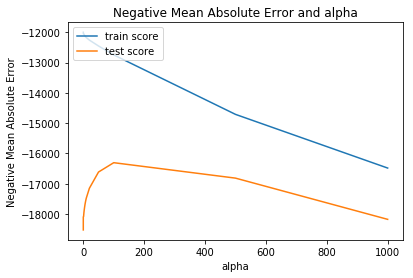

In [41]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [42]:
# model with optimal alpha
# Ridge regression
lm = Ridge(alpha=100)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9298309621005846
0.9280186391995269


In [43]:
# Ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
c = list(zip(cols, model_parameters))
c

[('constant', 181844.676),
 ('MSSubClass', -3275.442),
 ('LotFrontage', 2749.581),
 ('LotArea', 2504.361),
 ('OverallQual', 9804.602),
 ('OverallCond', 4570.418),
 ('YearBuilt', 3796.58),
 ('YearRemodAdd', 3739.601),
 ('MasVnrArea', 4343.976),
 ('BsmtFinSF1', 8374.271),
 ('BsmtFinSF2', 522.837),
 ('BsmtUnfSF', -253.747),
 ('TotalBsmtSF', 8722.699),
 ('1stFlrSF', 6279.074),
 ('2ndFlrSF', 4883.892),
 ('GrLivArea', 9442.035),
 ('BsmtFullBath', -138.185),
 ('BsmtHalfBath', -889.418),
 ('FullBath', 2620.355),
 ('HalfBath', 3368.434),
 ('BedroomAbvGr', -2058.172),
 ('TotRmsAbvGrd', 4641.788),
 ('Fireplaces', 2151.711),
 ('GarageYrBlt', 1299.501),
 ('GarageCars', 2782.465),
 ('GarageArea', 1971.765),
 ('WoodDeckSF', 1516.932),
 ('OpenPorchSF', 912.072),
 ('EnclosedPorch', 1444.789),
 ('ScreenPorch', 2089.718),
 ('MoSold', 102.271),
 ('YrSold', 742.458),
 ('MSZoning_FV', 2310.24),
 ('MSZoning_RH', 117.471),
 ('MSZoning_RL', 1070.67),
 ('MSZoning_RM', -1050.757),
 ('LotShape_IR2', 585.635),
 ('

In [44]:
coeff = pd.DataFrame(c)
coeff.reset_index
coeff
coeff.columns=['Feature','Coeff']
coeff.sort_values('Coeff',ascending=False).head(5)

,Feature,Coeff
0,constant,181844.676
4,OverallQual,9804.602
15,GrLivArea,9442.035
12,TotalBsmtSF,8722.699
9,BsmtFinSF1,8374.271


### From above it is clear that the predictive power for  Overall Quality, GrLivArea(Area above Ground), and TotalBsmtSF(Total Basement area) are high.

## Lasso Regression

In [45]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


regression = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = regression, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   13.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [46]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.093947,0.009171,0.000400,0.000490,0.0001,{'alpha': 0.0001},-19195.852932,-21442.036384,-16130.660782,-18054.677820,...,-18411.513053,1817.394938,28,-12371.221842,-11168.746493,-12343.203580,-11899.736610,-12237.642270,-12004.110159,450.115291
1,0.103124,0.024591,0.000798,0.000399,0.001,{'alpha': 0.001},-19195.834754,-21441.971442,-16129.821093,-18054.650027,...,-18411.318736,1817.586304,27,-12371.218867,-11168.742657,-12343.202795,-11899.736868,-12237.648962,-12004.110030,450.116793
2,0.100132,0.015094,0.000399,0.000489,0.01,{'alpha': 0.01},-19195.652960,-21441.322205,-16121.388102,-18054.372103,...,-18409.368381,1819.511141,26,-12371.190404,-11168.706181,-12343.200555,-11899.743212,-12237.718756,-12004.111821,450.132302
3,0.095348,0.010452,0.000799,0.000399,0.05,{'alpha': 0.05},-19194.844566,-21438.440544,-16083.203605,-18053.148730,...,-18400.562794,1828.290217,25,-12371.101359,-11168.588843,-12343.291066,-11899.776235,-12238.042919,-12004.160085,450.207106
4,0.097140,0.014350,0.000399,0.000489,0.1,{'alpha': 0.1},-19193.833252,-21434.875444,-16033.947810,-18051.633059,...,-18389.164367,1839.833278,24,-12371.037228,-11168.526821,-12343.482142,-11899.823859,-12238.457622,-12004.265534,450.289368


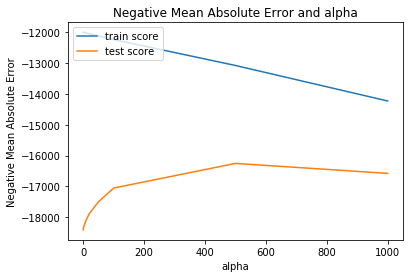

In [47]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [48]:
# model with optimal alpha which is 500
# lasso regression
lm = Lasso(alpha=500)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9267192836295162
0.9320259713203563


In [49]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
c = list(zip(cols, model_parameters))
coeff = pd.DataFrame(c)
coeff.reset_index
coeff.columns=['Feature','Coeff']
coeff['Coeff'].value_counts().head(5)

 0.000       87
 665.637      1
 133.125      1
 7122.720     1
-3495.382     1
Name: Coeff, dtype: int64

In [50]:
coeff.sort_values('Coeff',ascending=False).head(5)

,Feature,Coeff
0,constant,181792.406
15,GrLivArea,22340.699
4,OverallQual,12570.116
9,BsmtFinSF1,9758.650
12,TotalBsmtSF,8656.687


### From above it is clear that the predictive power for GrLivArea(Area above Ground), Overall Quality, and (Total Basement area) are high.